# Project: Dataset-TMDB MOVIES 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **The Data**: I have selected the 'tmdb-movies.csv' file, for analysis. The data consists of information on several movies. 
>
> There is information like popularity, title, keywords, tagline, directors, producers, rating, etc. A large amount of variables are provided for analysis. The **dependent variable** in this dataset is the voted rating, as it depends on the variables like runtime, genre, budget(in a way), time of release, the cast, etc. The latter, I believe, are all **independent variables**.
> A way to analyse this data, is to find out relations between the variables, if any, and how do they affect the success of the movie.
>Let us begin.

In [1]:
#Following are all the import statements we wil need to analyse the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Let us get a first look at our data. We will have a look at the different variables and also check if there are any errors in the data. The errors could be:

>>Missing Values

>>Null Values

>>Incorrect data types for entries

>>Incorrect arrangement of the data

>>Mismatch of entries, etc.

> If we do happen to find any of these, we must keep a note, so that we may get the errors rectified, and have a clean data set, easy to analyse on without many problems

In [2]:
df=pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>So, we have 21 columns, and 10866 entries(rows). 


>Using the info() function, we can identify which of columns have null entiries.
>>Here, the columns imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production companies have less than 10866 entries. All of these contain null values, and need to be dealt with.
Since factors like imdb_id, homepage, tagline, keywords, overview will not play a role in the analysis, these columns can be droppped, decreasing the worry about a few null values. 

>>Observing the output from the function head(), we see that an entry in  'genre' and 'cast' is a string, containing multiple entries in one, separated by a '|'. The genres need to be split for a better analysis.

>>Due to the inflation in 2010, the first 2 columns of revenue and budget might not give accurate data.

>>It is impossible for a movie to have zero budget or zero revenue.

Let us observe the columns having null values, which cannot be dropped
{cast, director, genres, production companies}

In [5]:
df[df.cast.isnull()].head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.0,0.0
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.0,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0


In [6]:
df[df.director.isnull()].head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.0,0.0
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,...,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.0,0.0
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,NaN,-,...,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.0,0.0
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,NaN,NaN,...,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.0,0.0


In [7]:
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [8]:
df[df.production_companies.isnull()].head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,...,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0
295,363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,...,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.0,0.0
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.0,0.0
328,308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.0,0.0


>A lot of the above columns have many common rows having NaN. Such rows have more than 1 missing field/value, adding to the problem of incomplete data.

>Having these rows will hinder the process of the analysis, so it would be better to remove these entries. It wont prove that big a deal too, as there are not many entries of the above kind.

In [9]:
df['genres'].head(10)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

>As we can see, genres are separated by the pipe symbol (|). The entry is a string, so accessing each part of it will be difficult.

### Data Cleaning

In [10]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview'], axis=1, inplace=True )

In [13]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>That removes the columns of data having unnecessary values.

>However, the problem of missing values is not yet solved completely.
We still have to clean the columns cast, director, genres, production_companies. But first, let us handle the problem with the genres.

Let us define another dataframe, smaller than the original dataframe, to help split the genres easily.
For default, we'll initialise it with np.zero

In [14]:
df_ref=pd.DataFrame()
df_ref['movie_name']=df['original_title']
df_ref['genres_list']=np.zeros(10866)
df_ref['genres_list'][0]=list(df['genres'][0].split('|'))
for i in range(10866):
    df_ref.iat[i,1]=list(str(df.iat[i,7]).split('|'))
df['genres']=df_ref['genres_list']
df.head(10)

C:\Users\Govind Thakur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Govind Thakur\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,"[Western, Drama, Adventure, Thriller]",Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,"[Science Fiction, Action, Thriller, Adventure]",Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,"[Drama, Adventure, Science Fiction]",Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,"[Family, Animation, Adventure, Comedy]",Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,"[Comedy, Animation, Family]",Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


>By this, We have separated the genres, from a string to a list. 
In the analysis, quite a bit of testing will be done on genres. However, entries in the column 'genres' are still not easily accesible, and a further separation is required.
For that, we will run some codes to: 


>>1) Get the different types of genres


>>2) Create smaller DataFrames, for each genre (classifying the data on basis of genres)

>By doing this, we can easily work on parameters related genres

In [15]:
genre_list=['']

for i in range(len(df_ref)):
    l=df_ref.iat[i,1]
    for j in range(len(l)):
        if(l[j] in genre_list):
            continue
        else:
            genre_list.append(l[j])
            
genre_list.remove('')
genre_list.remove('nan')

In [16]:
genre_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

>So, these are the different kinds of genres available in our data. We will a DataFrame for each genre. Lets define the Dataframes first.


In [17]:
cols=df.columns
cols=list(cols)
df_action=pd.DataFrame(columns=cols)
df_adventure=pd.DataFrame(columns=cols)
df_science_fiction=pd.DataFrame(columns=cols)
df_thriller=pd.DataFrame(columns=cols)
df_fantasy=pd.DataFrame(columns=cols)
df_crime=pd.DataFrame(columns=cols)
df_western=pd.DataFrame(columns=cols)
df_drama=pd.DataFrame(columns=cols)
df_family=pd.DataFrame(columns=cols)
df_animation=pd.DataFrame(columns=cols)
df_comedy=pd.DataFrame(columns=cols)
df_mystery=pd.DataFrame(columns=cols)
df_romance=pd.DataFrame(columns=cols)
df_war=pd.DataFrame(columns=cols)
df_history=pd.DataFrame(columns=cols)
df_music=pd.DataFrame(columns=cols)
df_horror=pd.DataFrame(columns=cols)
df_documentary=pd.DataFrame(columns=cols)
df_tv_movie=pd.DataFrame(columns=cols)
df_foreign=pd.DataFrame(columns=cols)

>Now, to fill in for each Dataframe. To reduce redundant coding, lets make a list of the DataFrames. Well call it list_of_dfs

In [18]:
list_of_dfs=[df_action, df_adventure, df_science_fiction, df_thriller, df_fantasy, df_crime, df_western, df_drama, df_family, df_animation, df_comedy, df_mystery, df_romance, df_war, df_history, df_music, df_horror, df_documentary, df_tv_movie, df_foreign]

>First, we will initialise all of the dataframes with df, the original dataframe.

In [19]:
for i in range(len(list_of_dfs)):
    list_of_dfs[i]=df

>Now, lets remove the entries not having a particular genre, for each Dataframe. 
>>[To ensure that the code below has run succesfully,and that the loops were not interrupted, we will print the genre that is currently being handled by the code.]

In [20]:
for i in range(len(genre_list)):
    drop_list=[]
    print(genre_list[i])
    for j in range(len(df)):
        if genre_list[i] in df.iat[j,7]:
            continue
        else:
            drop_list.append(j)
    list_of_dfs[i]=df.drop(drop_list)

Action
Adventure
Science Fiction
Thriller
Fantasy
Crime
Western
Drama
Family
Animation
Comedy
Mystery
Romance
War
History
Music
Horror
Documentary
TV Movie
Foreign


>Now that this has been handled, let us finally drop all NaN values, from all the dataframes.
Lets have a look at the df again, using the info() funtion.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


Dropping all rows with nulls,

In [22]:
df.dropna(inplace=True)

>Now that all missing values should have been removed, let us see how many entries(rows) remain.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9780 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9780 non-null float64
budget                  9780 non-null int64
revenue                 9780 non-null int64
original_title          9780 non-null object
cast                    9780 non-null object
director                9780 non-null object
runtime                 9780 non-null int64
genres                  9780 non-null object
production_companies    9780 non-null object
release_date            9780 non-null object
vote_count              9780 non-null int64
vote_average            9780 non-null float64
release_year            9780 non-null int64
budget_adj              9780 non-null float64
revenue_adj             9780 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


>After removing the rows having null values, **9780** entries remain.
>
>Now, lets clean the genre dataframes as well.

In [24]:
for i in range(len(genre_list)):
    list_of_dfs[i].dropna(inplace=True)
    

>Let us run a code, to check the number of null values in each column now. If the data is clean, the output should be 0 for all.

In [25]:
cols=df.columns
cols=list(cols)
no_na=np.zeros(15)
for i in range(15):
    no_na[i]=sum(df[cols[i]].isna())
no_na=no_na.astype(int,copy=False)
no_na=np.array(no_na)
no_na

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

>We have all zeroes, implying that our data does not have any missing values now.
>
>All that remians, is to work on the budget and revenue columns.
>
>Since we are to use the same code for 4 columns, let us define a function to ease our work.

In [26]:
def removing_zeros(df,str1):
    a=list(df[str1])
    b=df[str1].mean()
    for i in range(len(a)):
        if a[i]==0:
            a[i]=b
    return a

Now that we have defined the function, lets implement it into the columns.

In [27]:
df['budget']=removing_zeros(df,'budget')
df['budget_adj']=removing_zeros(df,'budget_adj')
df['revenue']=removing_zeros(df,'revenue')
df['revenue_adj']=removing_zeros(df,'revenue_adj')

<a id='eda'></a>
## Exploratory Data Analysis


###  Which genre has received larger number of "good" ratings?
This can help us see if genre has anything to do with getting a good rating

>Now that we have all genres separated, we can see the movies which have received high ratings. 
>
>Assuming a high rating to be 7.5 and above,

In [31]:
rating_count=[]
for i in range(len(list_of_dfs)):
    print("         For genre: {}".format(genre_list[i]))
    print('*'*40)                                            #for a good presentation
    ctr=0                                                    #counter
    for group in list_of_dfs[i].groupby('vote_average').groups:
        if group >=7.5:
            ctr=ctr+len(list_of_dfs[i].groupby('vote_average').groups[group])
    print(' '*15,ctr)    
    rating_count.append(ctr)


         For genre: Action
****************************************
                55
         For genre: Adventure
****************************************
                49
         For genre: Science Fiction
****************************************
                35
         For genre: Thriller
****************************************
                51
         For genre: Fantasy
****************************************
                31
         For genre: Crime
****************************************
                52
         For genre: Western
****************************************
                2
         For genre: Drama
****************************************
                183
         For genre: Family
****************************************
                37
         For genre: Animation
****************************************
                48
         For genre: Comedy
****************************************
                78
         For genre: Myster

Now, lets see the number of movies for each genre, having rating 7.5 and above

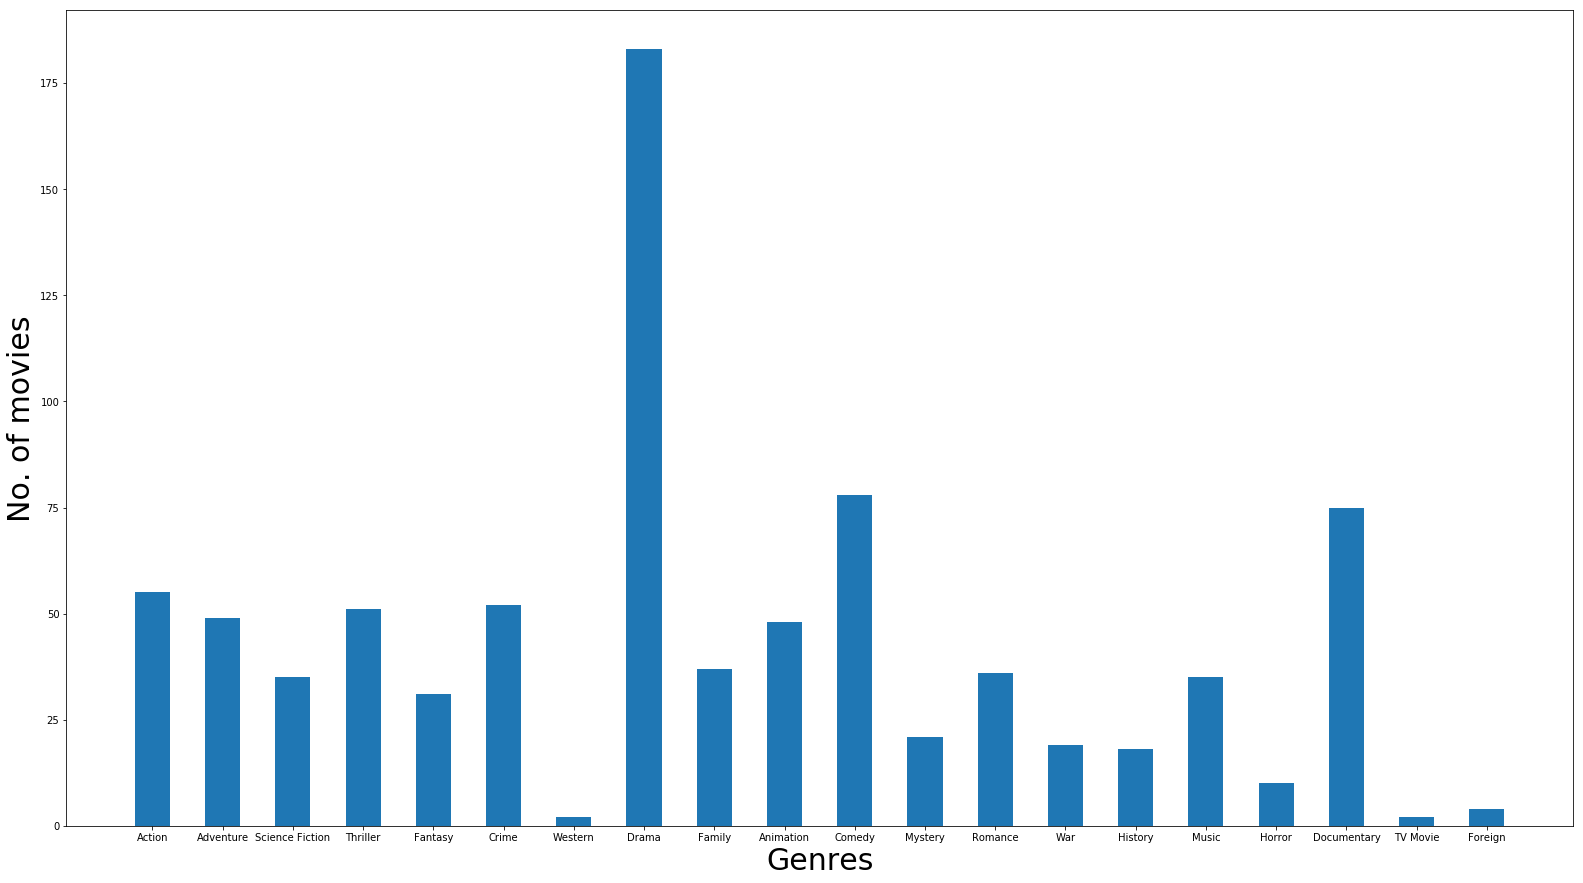

In [33]:
p.bar(genre_list,rating_count, width=0.5)
fig_size = p.rcParams["figure.figsize"]
p.xlabel('Genres',size=30)
p.ylabel('No. of movies',size=30)
fig_size[0]=27
fig_size[1]=15
p.show()

>>Looking at the graph, it is clear that the genre 'Drama'[183] has the highest number of movies, with rating 7.5 and above.
'Drama' is followed by 'Comedy'[78] and 'Documentary'[75]. 
>>
>>Among the lowest are 'Foreign'[4], 'Western'[2] and 'TV Movie'[2]

### Which movies of IMDB higher rating (8 and above) have runtime lesser than or equal to 2 hours? > 2 hours?
This will show if runtime was a decisive factor in rating

In [34]:
df_high_rating=df[df['vote_average']>=8]

Let us have a look at movies having a rating of 8 and above first.

In [35]:
df_high_rating.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9,6.326804,1.750000e+08,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,"[Comedy, Animation, Family]",Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
35,3.557846,6.000000e+06,3.540176e+07,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117,"[Drama, Thriller]",Element Pictures|No Trace Camping|A24|Duperele...,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07
377,0.198522,1.616950e+07,4.419513e+07,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,Mark Neale,138,[Documentary],First Movie Companie,9/2/15,14,8.0,2015,1.940318e+07,5.700652e+07
553,0.068741,1.616950e+07,4.419513e+07,Doctor Who: The Husbands of River Song,Peter Capaldi|Alex Kingston|Greg Davies|Matt L...,Douglas Mackinnon,60,"[Drama, Science Fiction, Comedy]",British Broadcasting Corporation (BBC),12/25/15,31,8.0,2015,1.940318e+07,5.700652e+07
609,0.033378,1.616950e+07,4.419513e+07,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,240,[Documentary],Blumhouse Productions|Hit the Ground Running F...,2/8/15,72,8.4,2015,1.940318e+07,5.700652e+07
611,0.032678,1.616950e+07,4.419513e+07,World of Tomorrow,Julia Pott|Winona Mae,Don Hertzfeldt,17,"[Animation, Comedy, Science Fiction]",Bitter Films,3/31/15,47,8.2,2015,1.940318e+07,5.700652e+07
629,24.949134,1.650000e+08,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,"[Adventure, Drama, Science Fiction]",Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
636,8.110711,1.400000e+07,2.335557e+08,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,Morten Tyldum,113,"[History, Drama, Thriller, War]",Black Bear Pictures|Bristol Automotive,11/14/14,3478,8.0,2014,1.289527e+07,2.151261e+08
650,4.780419,3.300000e+06,1.399309e+07,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,"[Drama, Music]",Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07
718,1.737699,4.900000e+06,3.494070e+06,Mommy,Anne Dorval|Suzanne ClÃ©ment|Antoine-Olivier P...,Xavier Dolan,138,[Drama],TÃ©lÃ©film Canada|Super Ã‰cran|SODEC|Metafilms,5/22/14,389,8.0,2014,4.513346e+06,3.218357e+06


Segregating the movies by their runtime (2 hours),

In [36]:
count=0
for i in range(len(df_high_rating)):
    if df_high_rating.iat[i,6]<=120:       #Runtime is provided in minutes, and 2 hours is 120 minutes
        count=count+1
print("Number of movies having runtime <=120 :",count)
print("Number of movies having runtime >120 :",i+1-count)    #as the loop has terminated, i must be the length of the df -1

Number of movies having runtime <=120 : 36
Number of movies having runtime >120 : 25


>While we're at it, let us also see the variation of ratings with time.
>
>The graph of the entire dataframe is difficult to plot, so well just look at the higher ratings

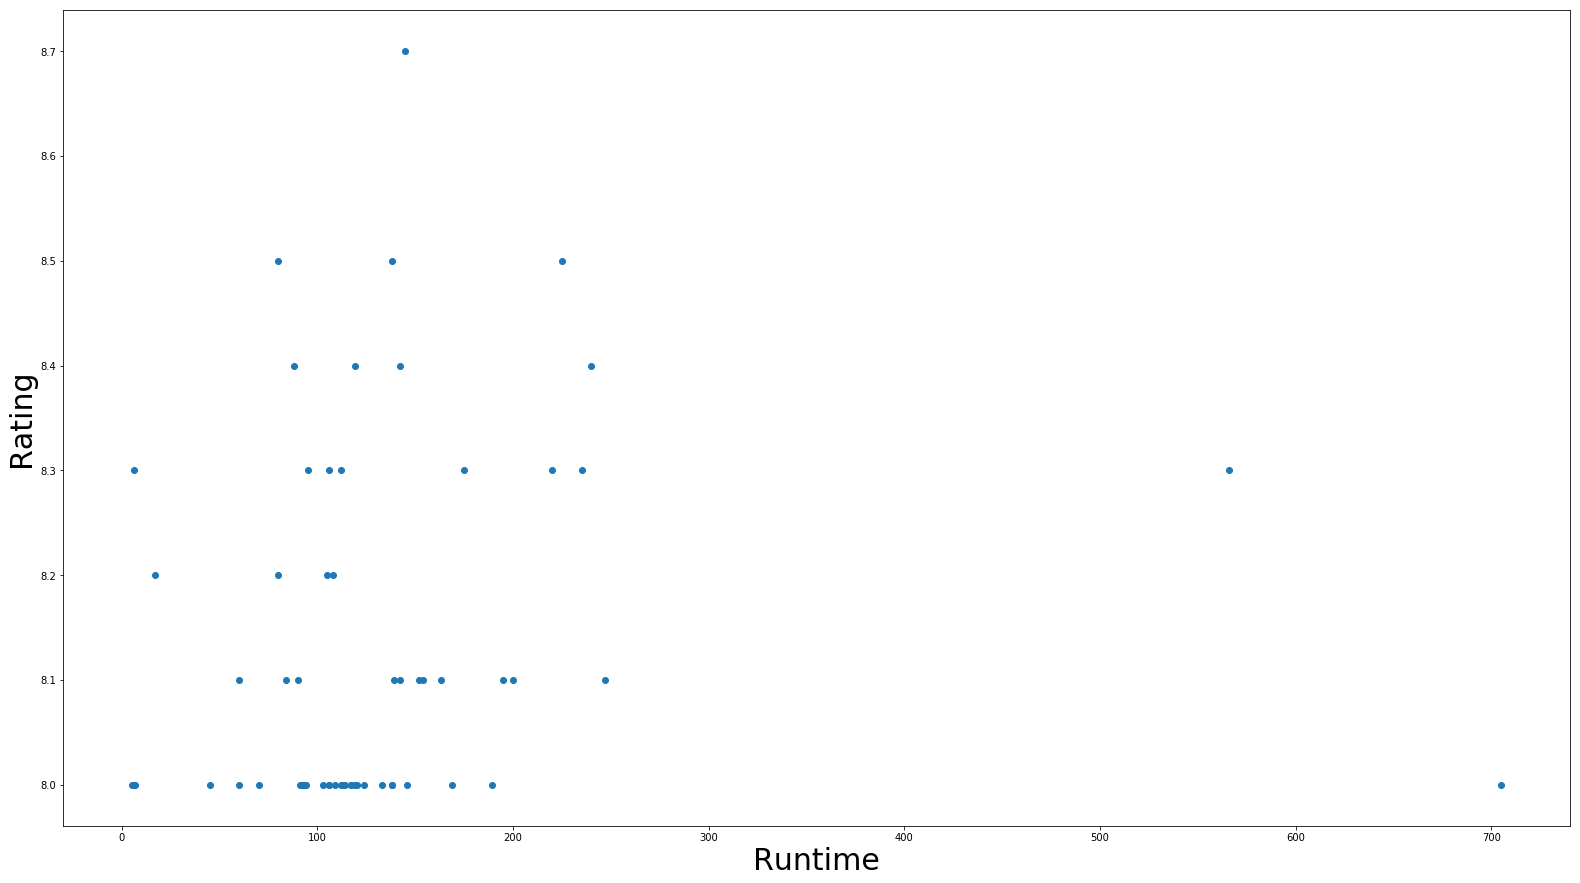

In [37]:
p.scatter(df_high_rating['runtime'],df_high_rating['vote_average'])
fig_size = p.rcParams["figure.figsize"]
p.xlabel('Runtime',size=30)
p.ylabel('Rating',size=30)
fig_size[0]=27
fig_size[1]=10
p.rc('xtick', labelsize=30) 
p.rc('ytick', labelsize=30)
p.show()

The plot appears spread, with a few movies having runtime greater than 500 minutes. Whats more, all of those movies have high ratings.



### Amongst movies within top 10% of the highest budget, which genre is the most popular? Also, how many movies have been rated high?
We can find out, which genre usually requires a high budget, and wether taking a high budget ensures a good rating. 

In [38]:
df1=df.sort_values('budget_adj',ascending=False)

In [39]:
df1

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,"[Adventure, Fantasy, Action, Western, Thriller]",Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,"[Adventure, Action, Fantasy]",Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,"[Adventure, Fantasy, Action]",Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
6570,1.957331,270000000.0,3.910812e+08,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,"[Adventure, Fantasy, Action, Science Fiction]",DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08
5231,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,"[Drama, Romance, Thriller]",Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
7394,2.520912,258000000.0,8.908716e+08,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,139,"[Fantasy, Action, Adventure]",Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,2.713305e+08,9.369017e+08
1929,2.865684,260000000.0,5.917949e+08,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,100,"[Animation, Family]",Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,2.600000e+08,5.917949e+08
14,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,"[Action, Adventure, Science Fiction]",Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
1389,5.076472,250000000.0,9.339592e+08,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,153,"[Adventure, Fantasy, Family]",Warner Bros.|Heyday Films,7/7/09,3220,7.3,2009,2.541001e+08,9.492765e+08
8089,1.232098,175000000.0,2.642182e+08,Waterworld,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. C...,Kevin Reynolds,135,"[Adventure, Action]",Universal Pictures|Gordon Company|Davis Entert...,7/28/95,557,5.8,1995,2.504192e+08,3.780875e+08


In [40]:
genre_count=[]
budget=[]
rating=[]
for i in range(len(genre_list)):
    ctr=0
    for j in range(978):
        if genre_list[i] in df1.iat[j,7]:
            ctr=ctr+1
        budget.append(df1.iat[j,13])
        rating.append(df1.iat[j,11])
    genre_count.append(ctr)

Now that we have the needed data, lets put it in a proper order.

In [41]:
df2=pd.DataFrame()    
df2['genre']=genre_list
df2['count']=genre_count

In [42]:
df2.sort_values('count', ascending=False)

,genre,count
0,Action,474
1,Adventure,407
7,Drama,321
3,Thriller,315
10,Comedy,300
2,Science Fiction,219
8,Family,212
4,Fantasy,210
5,Crime,135
9,Animation,126


So, we can see that Action was the most used, or has been the most popular genre

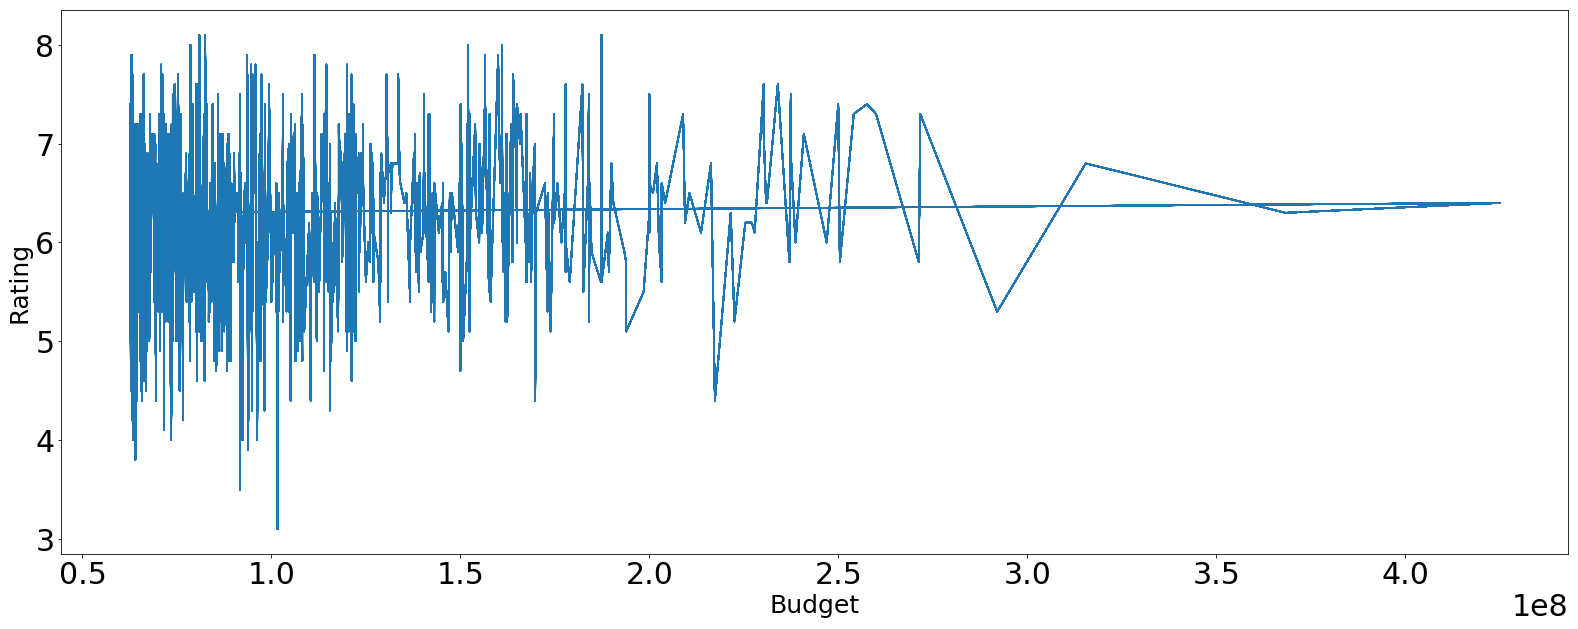

In [43]:
#plotting budget vs rating
p.plot(budget, rating)
p.xlabel('Budget', size=25)
p.ylabel('Rating', size=25)
p.rc('xtick', labelsize=30) 
p.rc('ytick', labelsize=30)
p.show()

>From the plot above(not the best, but the fastest available), we can judge a few things
>>The movies lying in the lower region of the top 10% in budget, have varying ratings.
>>
>>A larger amount of the movies in the top 10% budget have a good rating
>>
>>The movies with the highest budget, on the other hand, do not have very good ratings. They have about average ratings, of around 6.0 to 6.5

### Has the budget increased over the years? Or has it remained the same?

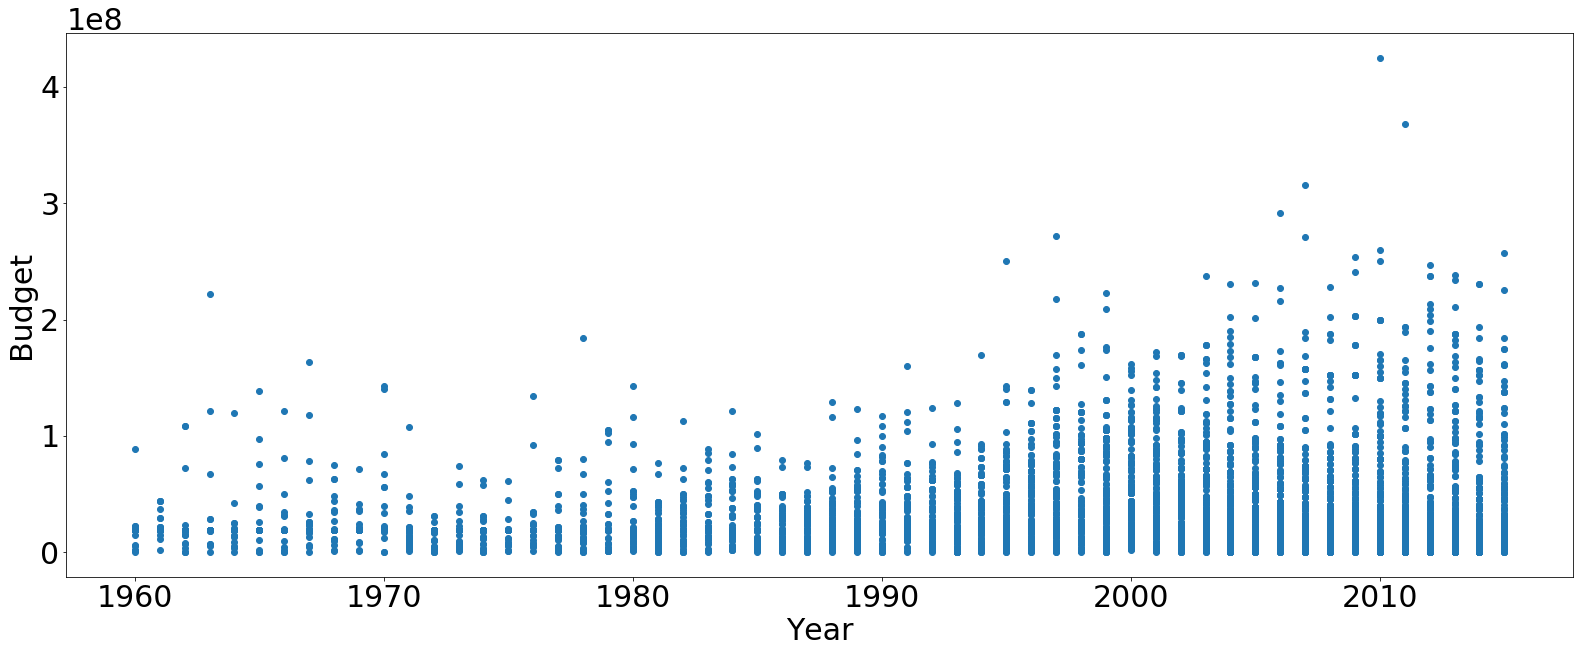

In [44]:
p.scatter(df1['release_year'],df1['budget_adj'])
fig_size[0]=40
fig_size[1]=15
p.xlabel('Year', size=30)
p.ylabel('Budget', size=30)
p.show()




The plot doesn't show a continuous rise or fall. What we can comprehend from it, is that the budget has not risen by too great an extent. We can say, however, that the budget of movies in the later years is a little higher than those of the previous years.

There is a peak, somewhere in the 2010s, after which, the budget of movies began to decrease again. We could say that it is possible, that there was some global even in the 2010s, due to which the budget of all the movies started decreasing. 

### How many directors released more than 2 consecutive popular movies? 

 Lets load the Dataframe containing tmbd rating 8.0 and above again

In [45]:
df_high_rating

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9,6.326804,1.750000e+08,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,"[Comedy, Animation, Family]",Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
35,3.557846,6.000000e+06,3.540176e+07,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117,"[Drama, Thriller]",Element Pictures|No Trace Camping|A24|Duperele...,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07
377,0.198522,1.616950e+07,4.419513e+07,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,Mark Neale,138,[Documentary],First Movie Companie,9/2/15,14,8.0,2015,1.940318e+07,5.700652e+07
553,0.068741,1.616950e+07,4.419513e+07,Doctor Who: The Husbands of River Song,Peter Capaldi|Alex Kingston|Greg Davies|Matt L...,Douglas Mackinnon,60,"[Drama, Science Fiction, Comedy]",British Broadcasting Corporation (BBC),12/25/15,31,8.0,2015,1.940318e+07,5.700652e+07
609,0.033378,1.616950e+07,4.419513e+07,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,240,[Documentary],Blumhouse Productions|Hit the Ground Running F...,2/8/15,72,8.4,2015,1.940318e+07,5.700652e+07
611,0.032678,1.616950e+07,4.419513e+07,World of Tomorrow,Julia Pott|Winona Mae,Don Hertzfeldt,17,"[Animation, Comedy, Science Fiction]",Bitter Films,3/31/15,47,8.2,2015,1.940318e+07,5.700652e+07
629,24.949134,1.650000e+08,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,"[Adventure, Drama, Science Fiction]",Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
636,8.110711,1.400000e+07,2.335557e+08,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,Morten Tyldum,113,"[History, Drama, Thriller, War]",Black Bear Pictures|Bristol Automotive,11/14/14,3478,8.0,2014,1.289527e+07,2.151261e+08
650,4.780419,3.300000e+06,1.399309e+07,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,"[Drama, Music]",Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07
718,1.737699,4.900000e+06,3.494070e+06,Mommy,Anne Dorval|Suzanne ClÃ©ment|Antoine-Olivier P...,Xavier Dolan,138,[Drama],TÃ©lÃ©film Canada|Super Ã‰cran|SODEC|Metafilms,5/22/14,389,8.0,2014,4.513346e+06,3.218357e+06


We can simply check if any director's name was repeated in this dataframe, using the funtion value_counts() 

In [46]:
df_high_rating['director'].value_counts()

Martin Scorsese                                                                                                   2
Quentin Tarantino                                                                                                 2
Christopher Nolan                                                                                                 2
Frank Darabont                                                                                                    2
Francis Ford Coppola                                                                                              2
Mark Neale                                                                                                        1
Martin Scorsese|Michael Henry Wilson                                                                              1
Alfred Hitchcock                                                                                                  1
Steven Spielberg                                                        

So, we have 5 directors, having 2 movies (highest number). They are

1)Francis Ford Coppola

2)Christopher Nolan

3)Martin Scorsese

4)Quentin Tarantino                                                                                               

5)Frank Darabont                                                                                                    

In [47]:
director_list=['Francis Ford Coppola', 'Christopher Nolan', 'Martin Scorsese', 'Quentin Tarantino', 'Frank Darabont']
for i in range(len(director_list)):
    df1=df[df['director']==director_list[i]].sort_values('release_year')
    for j in range(len(df1)-1):
        if df1.iat[j,11]>=8.0:
            if df1.iat[j+1,11]>=8.0:
                print(director_list[i])
            
       


Francis Ford Coppola
Frank Darabont


So, only 2 directors, have released 2 consecutive popular movies.

### In which year was the highest number of movies released? How is the trend?

>First, lets find out from the boundaries of the years we have in our data.

In [48]:
print("The latest movie is of the year ",df['release_year'].max())
print("The oldest movie is of the year ",df['release_year'].min())

The latest movie is of the year  2015
The oldest movie is of the year  1960


>So, we have movies from 2015, all the way back to 1960. Now, to find our answer, we can simply use the function value_counts(), and check. We could expect 2015 to be the highest, if the trend has been increasing.

In [49]:
df['release_year'].value_counts()

2014    635
2013    568
2015    558
2012    500
2009    475
2011    456
2008    441
2010    421
2007    389
2006    350
2005    323
2003    254
2004    253
2002    241
2001    212
1999    212
2000    197
1996    196
1998    191
1997    180
1994    174
1993    172
1995    170
1988    132
1989    129
1992    126
1990    126
1991    125
1987    113
1986    109
1985    106
1984     99
1982     80
1981     78
1983     77
1980     73
1978     61
1979     56
1971     55
1973     55
1977     55
1976     46
1966     44
1974     44
1975     42
1964     41
1970     41
1968     37
1972     37
1967     36
1963     34
1965     34
1960     32
1961     30
1962     30
1969     29
Name: release_year, dtype: int64

>So, we that 2014 has the highest number of movies released, followed by 2013, and then by 2015. 2015 **was not** the year with maximum movies.

>Let us plot the data, in order to understand the trend. (Keeping X as year, and Y as no. of movies)

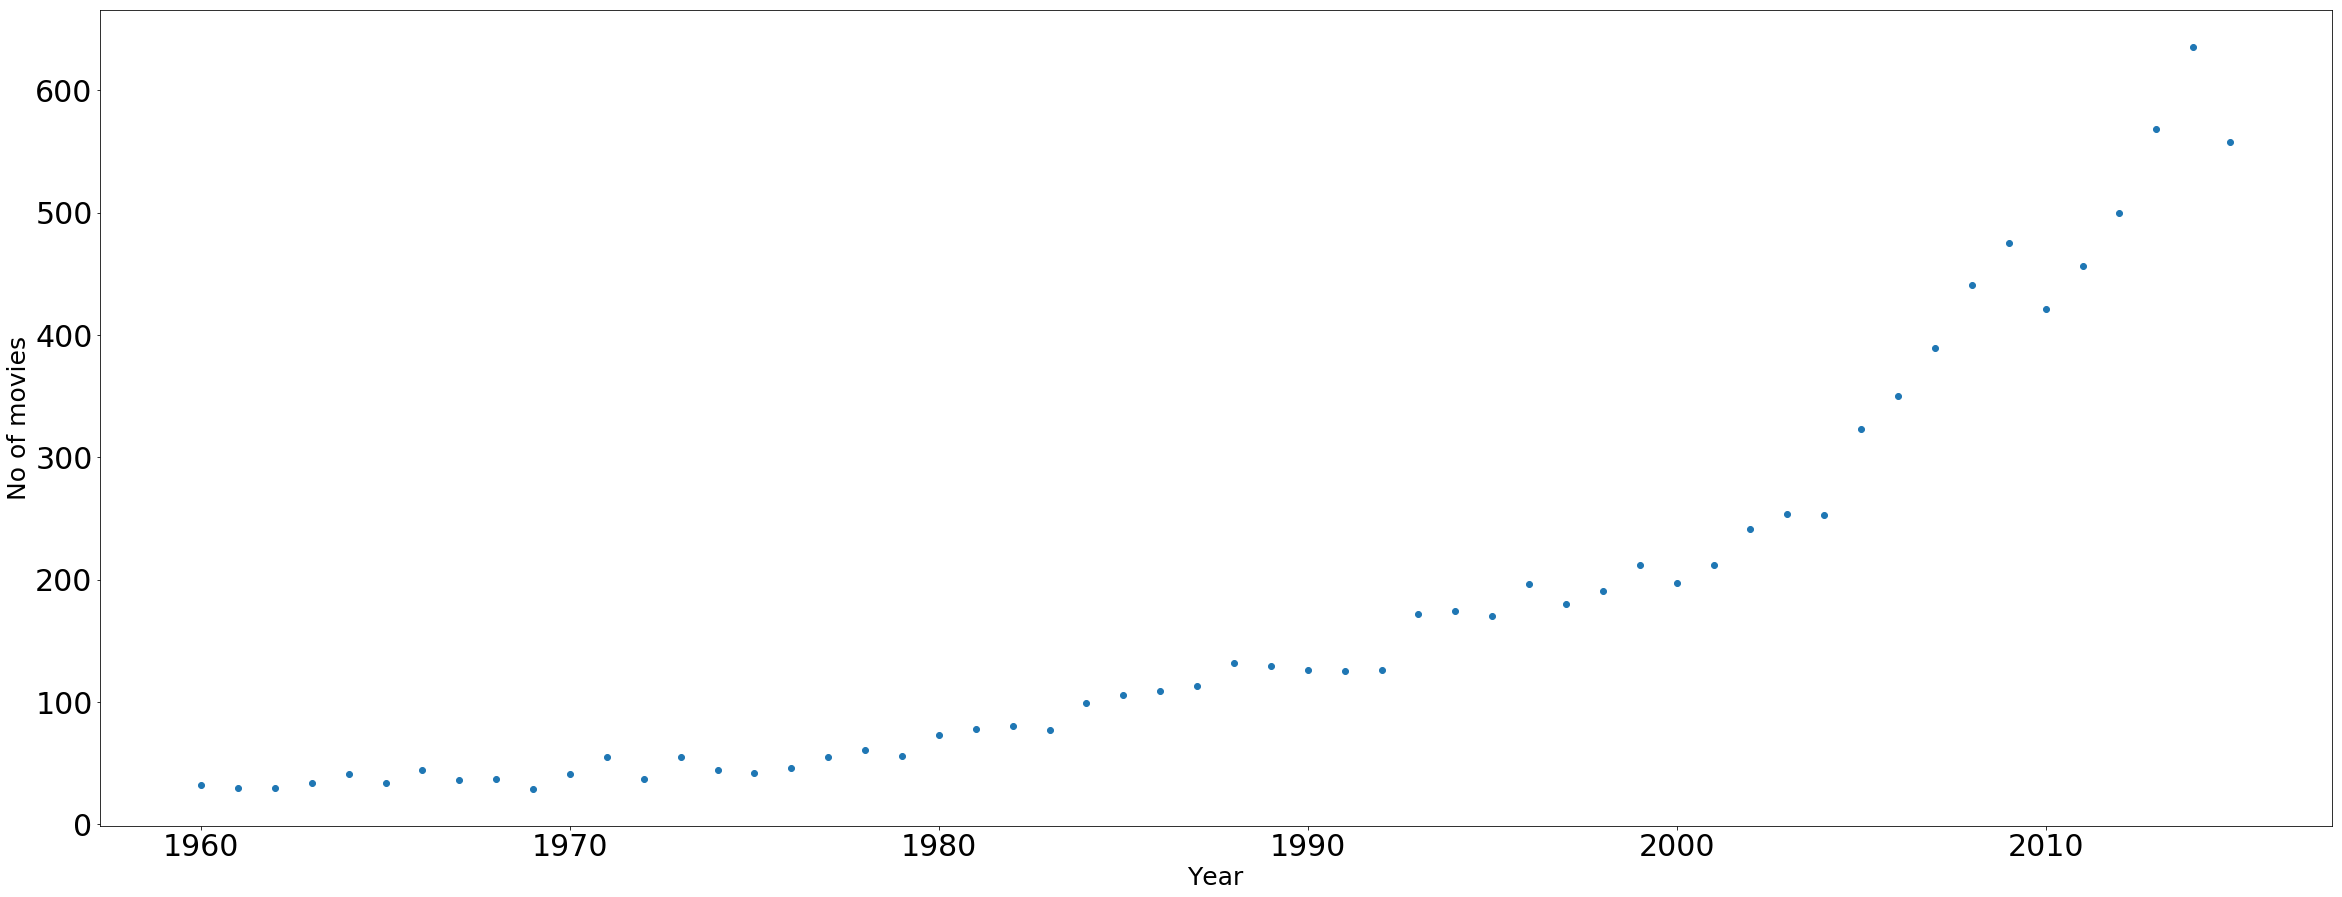

In [50]:
p.scatter(df['release_year'].value_counts().index,df['release_year'].value_counts());
p.xlabel('Year', size=25)
p.ylabel('No of movies', size=25)
p.rc('xtick', labelsize=30) 
p.rc('ytick', labelsize=30) 

We see, that the trend is increasing overall, with few years as exceptions. 2014 is the year with highest amount of movies released, and 1969 is the year with the least amount of movies released.

<a id='conclusions'></a>
## Conclusions

> After finding out answers to the above questions, we may note that:
Drama, Comedy and Documentary based movies, are more appealing to the public, seeing that they have larger movies, with higher rating.

>However, not many movies of the Genre Foreign, TV movie, Western have received high ratings
It could also be, that making a good movie out of these genres is more difficult, compared to The. three before

>Observing the results from analysing runtime and ratings, from movies having higher ratings, we see **that there are more popular movies with runtime lesser than 2 hours, than movies with runtime greater than two hours**.
>>This could be explained seeing psychologically. A person would rather enjoy a short-and-sweet movie, over a long, intense one. However, **we cannot conclude that shorter movies are more succesfull. There are movies, with runtime greater than 2 hours, having higher ratings**
>We also saw that Action was the most used, or has been the most popular genre among high-budget movies. We may conclude that **genres like Action, usually require a comparitively higher budget then other genres**.
>
>From the plot of budget vs rating, we observed that:
>>The movies lying in the lower region of the top 10% in budget, have varying ratings.
>>
>>A larger amount of the movies in the top 10% budget have a good rating
>>
>>The movies with the highest budget, on the other hand, do not have very good ratings. They have about average ratings, of around 6.6 to 6.5
>The plot doesn't show a continuous rise or fall. What we can comprehend from it, is that ***the budget has not risen by too great an extent***. We *can* say, however, that the budget of movies in the later years is a little higher than those of the previous years. This could be explained by the fact that due to the progress of the filming industry, more and more money is available as budget.
> **We can conclude, that using a high budget will not garuntee a high rating to a movie.**
>
>There is a peak, somewhere in the 2010s, after which, the budget of movies began to decrease again. We could say that it is possible, that there was some global even in the 2010s, due to which the budget of all the movies started decreasing. 
>
> Upon searching for dirctors who had consecutive high ratings,We saw that ***only 2 directors have released 2 consecutive popular movies.***
[2 was the highest number of consecutive movies]
>
>The number of movies released per year, ***has been rising overall***, with a few exceptions. We can conclude from this, the filming industry has definitely grown from 1960, till 2015. 
>
>
>After making these observations, I feel there will be some cases of error in the analysis, and the possible conclusions we derive from it.
>
>**The data could be wrong**
>>There could be errors in the input data, like an extra digit, or an incorrect genre entry, or a misplaced missing value.(there could be other errors like these as well)

>**Error in setting limits**

>>It is probable that the ratings I have assumed might be too much, or too less. But that depends on the judgement of the analyser. For example, I thought a good rating was 7.5 to 8.0, and a high rating to be 8.0 and above. For someone else, an excellent rating could be 7.0 and above. Also, the 2 hour-divisor could be wrong. Maybe others would take 150 minutes as a separator, or maybe 110.

>**The ratings given also depends on the number of people who voted**

>>For example, lets say that 10 people really liked a movie, so they gave it a rating of 9. But it turns out, they were the only people who watched/voted for it. If more 100 people didnt like that movie, but didnt vote for it, its actual rating is lost. The same situation could be reversed as well.

>**The entries lost due to missing values**

>>The entries having missing values, that could not be filled logically, had to be removed. We lost around 1000 entries because of that. Those 1000 entries could have led to a major change in the results in the analysis.

>**columns like tagline were removed, which could have been important variables to obtain accurate results.**

>>There were some columns, which had too many missing values, and hence could not be used effectively for analysis. Some had over 7000 entries missing. Had we used the dropna() function, we would be left with only about 2000 entries, instead of around 10000.

>**Filling of values**

>>Since  0 budget, 0 revenue is impossible, those entries had to be filled with the mean values. It is highly probable, that the mean budget/revenue doesn't match the actual budget/revenue, leading to a possible error in results.